In [10]:
# imports

import os
import torch
from skimage import io, measure
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread, imsave

import warnings
warnings.filterwarnings('ignore')

from tifffile import imread




if not torch.cuda.is_available():
    raise ValueError("GPU not found, code will run on CPU and can be extremely slow!")
else:
    device = torch.device("cuda:0")

import time
from glob import glob
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping
import torch.optim as optim
import torch.utils.data as dt


import sys
sys.path.append('../../gap/')
from GAP_UNET_ResBlock import UN
from BinomDataset import BinomDataset
from inference import sample_image

In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [3]:
ffhq = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/ffhq/faces/00000.png'

In [48]:
data = plt.imread(ffhq, format = np.float32)

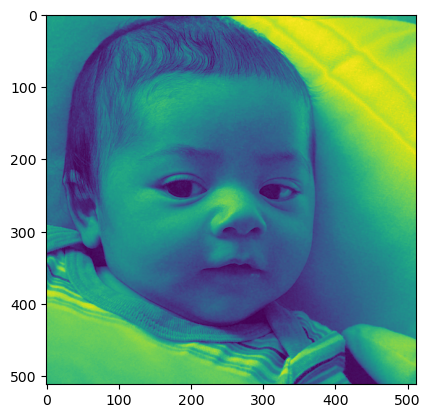

In [28]:
plt.imshow(data.transpose(2, 0, 1)[None][0,2,:,:])

In [49]:
data = data.transpose(2, 0, 1)[None]

In [50]:
data.shape

(1, 3, 512, 512)

In [8]:
import os
os.chdir('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/GAP/gap')
from BinomDataset import BinomDataset

In [51]:
minPSNR = -40
maxPSNR = +30
windowSize = (256, 256)

dataset = BinomDataset(data = data, windowSize= windowSize, minPSNR= minPSNR, maxPSNR= maxPSNR)
dataloader = dt.DataLoader(dataset, batch_size = 1, shuffle = False)

In [52]:
img = next(iter(dataloader))

In [53]:
img.shape

torch.Size([1, 2, 3, 256, 256])